${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\operatorname {exp} \left(-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}\right)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}\quad -\infty <x<\infty }$





In [466]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

size = 10
mean = 15
sig = 5
x_min = -size + mean
x_max = size + mean
n = x_max-x_min+1
index = np.arange(n)

In [467]:
x = np.zeros(shape=(n),dtype=int)
for i in index:
    x[i] = x_min+i

In [481]:
f = np.zeros(shape=(n))
for i in index:
    #f[i] = math.pow(2*math.pi*sig,-1/2) * math.exp(-math.pow((x[i]-mean)/sig,2)/2)
    f[i] = np.random.random_sample()
    


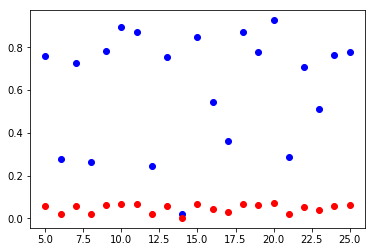

In [482]:
norm = 0
for i in index:
    norm += f[i]
f_norm = np.true_divide(f , norm)
plt.plot(x, f, 'bo', x, f_norm,'ro')
plt.show()

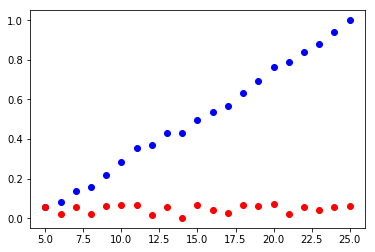

[0.05849858 0.07996931 0.13590543 0.15601745 0.21634853 0.28525648
 0.35235949 0.37123807 0.42954939 0.43125796 0.49656091 0.53858672
 0.56649447 0.63370487 0.69360376 0.76498551 0.78697731 0.84163852
 0.88111579 0.93992484 1.        ]


In [483]:
cdf = np.zeros(shape = (n))
cdf[0] = f_norm[0]
for i in range(1,n):
    cdf[i] = cdf[i-1]+f_norm[i]
plt.plot(x, cdf, 'bo',  x, f_norm,'ro')
plt.show()
print(cdf)

average x: 10.600000
0.6181820219057779
0.618182021905778


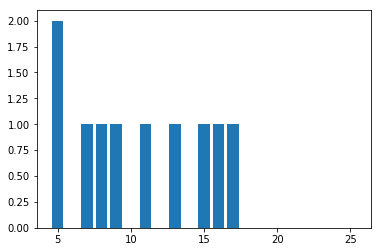

In [485]:
nSample = 10
smp_x = np.zeros(shape = (nSample), dtype=int)
smp = np.zeros(shape = (nSample))

amount = np.zeros(shape=(n))

upper = n
lower = 0
for i in range(nSample):
    idx = np.nonzero((cdf-np.random.random_sample()).clip(min=0))[0][0]
    smp_x[i] = idx
    amount[idx] += 1
    smp[i] = f[idx]*(1/(x_max-x_min+1)/(f_norm[idx]))
    #print("true" if f_norm[idx] == cdf[idx]-(cdf[idx-1] if idx >= 1 else 0) else "false" , \
    #      f_norm[idx] , "  <>  " , cdf[idx]-(cdf[idx-1]))
    
   

print( "average x: {:f}".format(x_min + np.average(smp_x)))
print(np.average(smp))
print(np.average(f))

plt.bar(x, amount, align='center')
plt.show()